In [2]:
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install gensim
!pip install nltk
%matplotlib inline

In [ ]:
# Importing modules
import pandas as pd
import os
import glob
import csv

# path for all csv files
# path for original livechat csv files
# path = '/home/jovyan/LiveChat/'
# path for n grouped livechat csv files
# path = '/home/jovyan/NGroupedLC/'
# path for speaker grouped livechat csv files
path = '/home/jovyan/SpeakerGroupedLC/'

# path for original transript csv files
# path = '/home/jovyan/Transcripts/'
# path for speaker grouped transript csv files
# path = '/home/jovyan/GroupedTranscripts/'

allfiles = glob.glob(path + "*.csv")
fileList = []
for file in allfiles:
    df = pd.read_csv(file, quoting=csv.QUOTE_NONE, encoding='utf-8')
    fileList.append(df)
    
papers = pd.concat(fileList, axis=0, ignore_index=True)

# Print head
papers.head()

,author,message,message message
0,Dread Man,hope my data todae won't be misused in terms o...,NaN
1,Reformation Network SA,He is already complaining. that Maleka was ask...,NaN
2,Danie,He loves his own voice.,NaN
3,lucky Molepo,crying baby he thought he would come and sing ...,NaN
4,Lixa Mlatha,He thinks he's smart Which witness asked to re...,NaN


In [16]:
# Load the regular expression library
import re
# Remove punctuation
papers['message_processed'] = \
papers['message'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['message_processed'] = \
papers['message_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['message_processed'].head()

TypeError: expected string or bytes-like object

In [3]:
# remove emojis
import re
papers = papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
papers.head()

,starttime,endtime,message,message_processed
0,time,9:13,message hope my data todae won't be misused in...,message hope my data todae won't be misused in...
1,9:30,10:44,But they allowed Paraffin to sing alone @luck...,but they allowed paraffin to sing alone @luck...
2,10:48,12:21,Mr Manyi must just answer questions finish an...,mr manyi must just answer questions finish an...
3,12:30,14:11,"""and they were never questioned Waiting for M...","""and they were never questioned waiting for m..."
4,14:13,16:37,some people argue like this is a court of law...,some people argue like this is a court of law...


In [4]:
# remove multiple whitespaces, tabs and newlines
papers['message_processed'] = papers['message_processed'].str.replace('\n', '')
papers['message_processed'] = papers['message_processed'].str.replace('\t', ' ')
papers['message_processed'] = papers['message_processed'].str.replace(' {2,}', ' ', regex=True)
papers['message_processed'] = papers['message_processed'].str.strip()

papers.head(10)

,starttime,endtime,message,message_processed
0,time,9:13,message hope my data todae won't be misused in...,message hope my data todae won't be misused in...
1,9:30,10:44,But they allowed Paraffin to sing alone @luck...,but they allowed paraffin to sing alone @lucky...
2,10:48,12:21,Mr Manyi must just answer questions finish an...,mr manyi must just answer questions finish and...
3,12:30,14:11,"""and they were never questioned Waiting for M...","""and they were never questioned waiting for ma..."
4,14:13,16:37,some people argue like this is a court of law...,some people argue like this is a court of law ...
5,16:58,18:36,"""You may or may not agree with Manyi @thato m...","""you may or may not agree with manyi @thato m ..."
6,18:45,19:31,we need answers manyi don't want Maleka now ...,"we need answers manyi don't want maleka now ""t..."
7,19:31,20:48,"""Maleka is just here to defend some people no...","""maleka is just here to defend some people not..."
8,20:52,21:53,It is acceptable to raise procedural fairness...,it is acceptable to raise procedural fairness ...
9,21:54,22:54,Otherwise this will crush all his evidence an...,otherwise this will crush all his evidence and...


In [8]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'chairperson', 'now', 'use', 'go', 'please', 'get', 'mr','lol','guy','jimmy','thato', 'hi'])
papers['message_processed1'] = papers['message_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers['message_processed1'].head()

0    message hope data todae misused terms relevant...
1    allowed paraffin sing alone @lucky molepo male...
2    manyi must answer questions finish klaar witne...
3    "and never questioned waiting manyi declare lu...
4    people argue like court law inquiry tell advoc...
Name: message_processed1, dtype: object

Loading dataset...
done in 0.001s.
Extracting tf-idf features for NMF...
done in 0.104s.
Extracting tf features for LDA...
done in 0.093s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.904s.


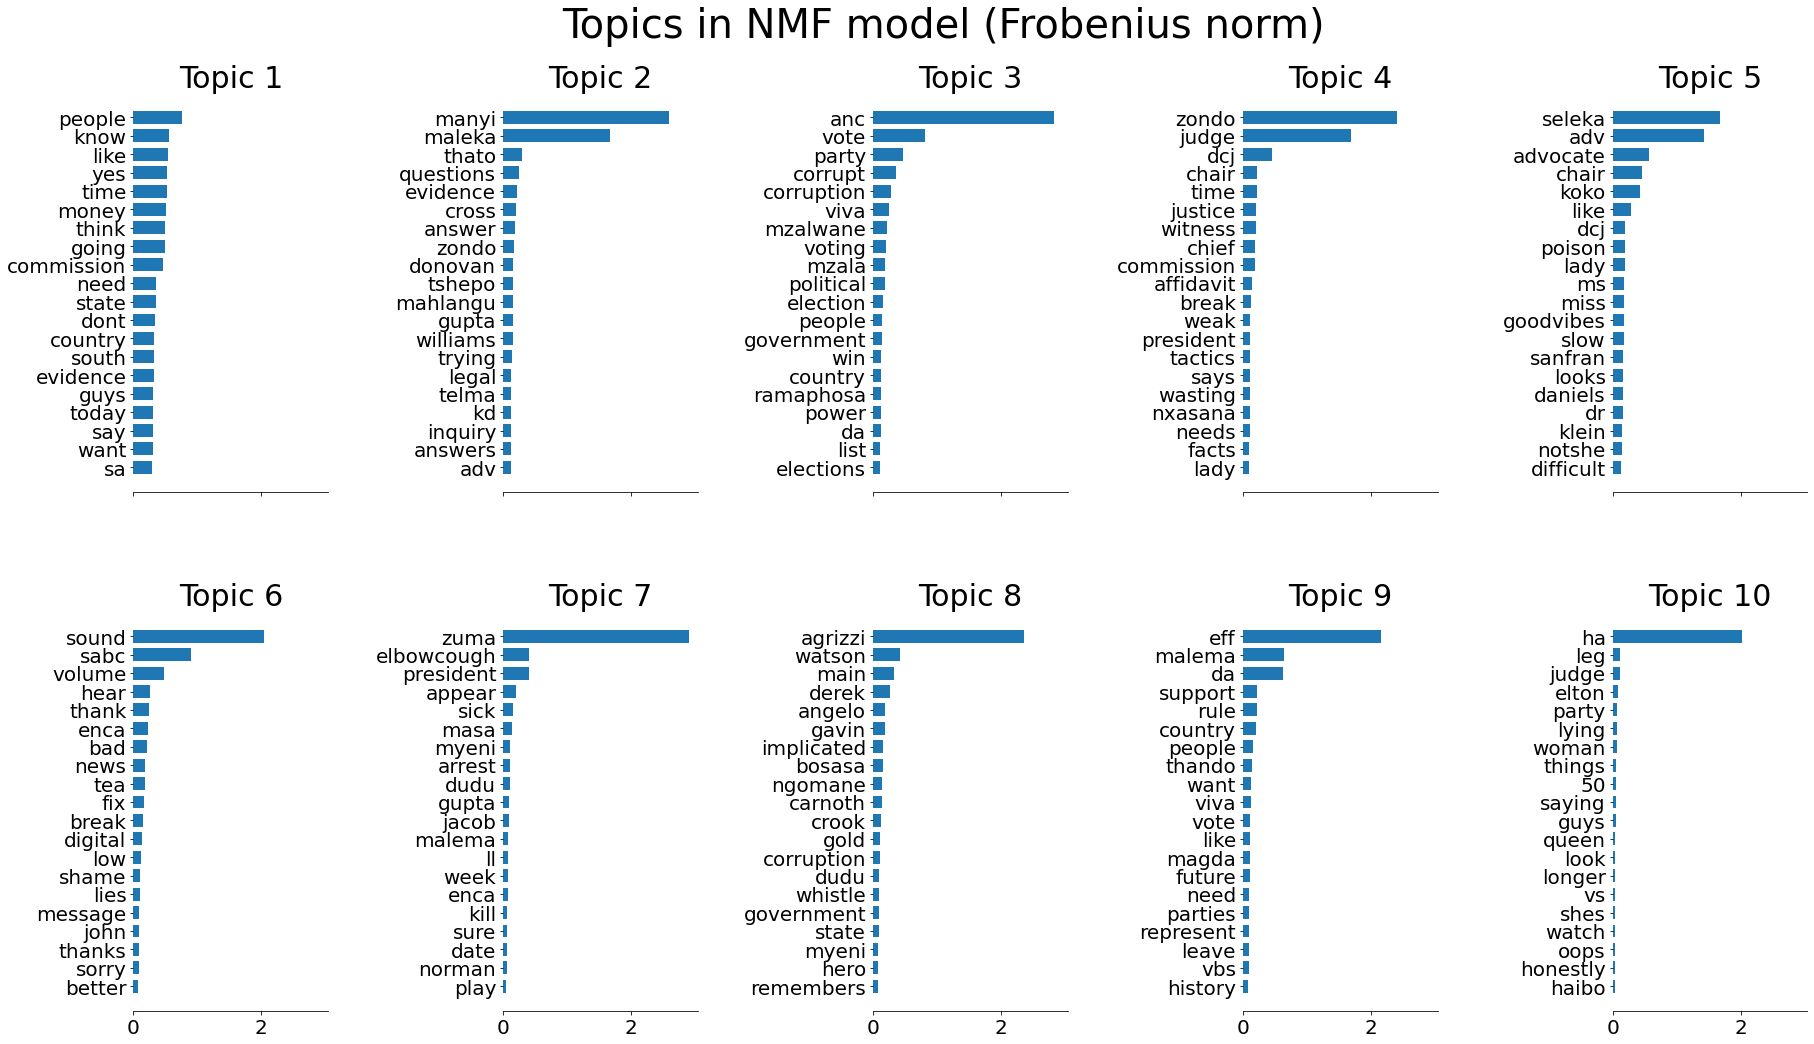



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 2.178s.


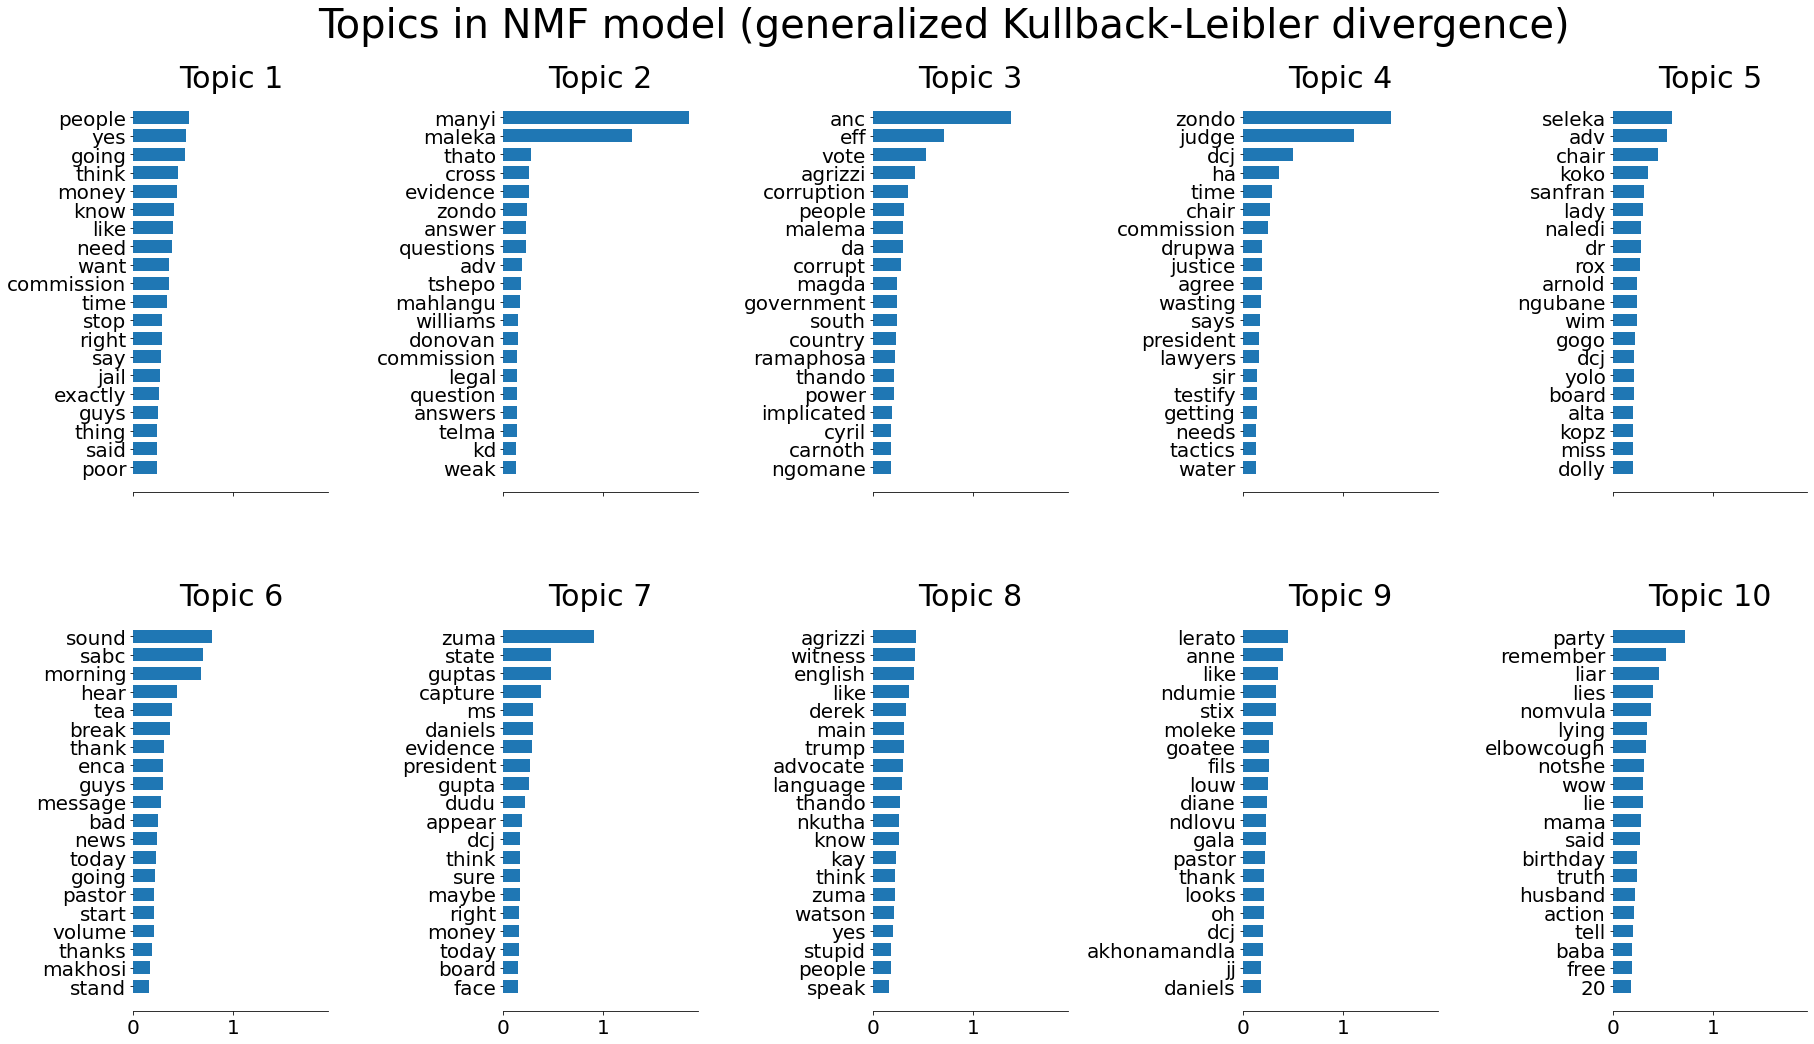



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 3.236s.


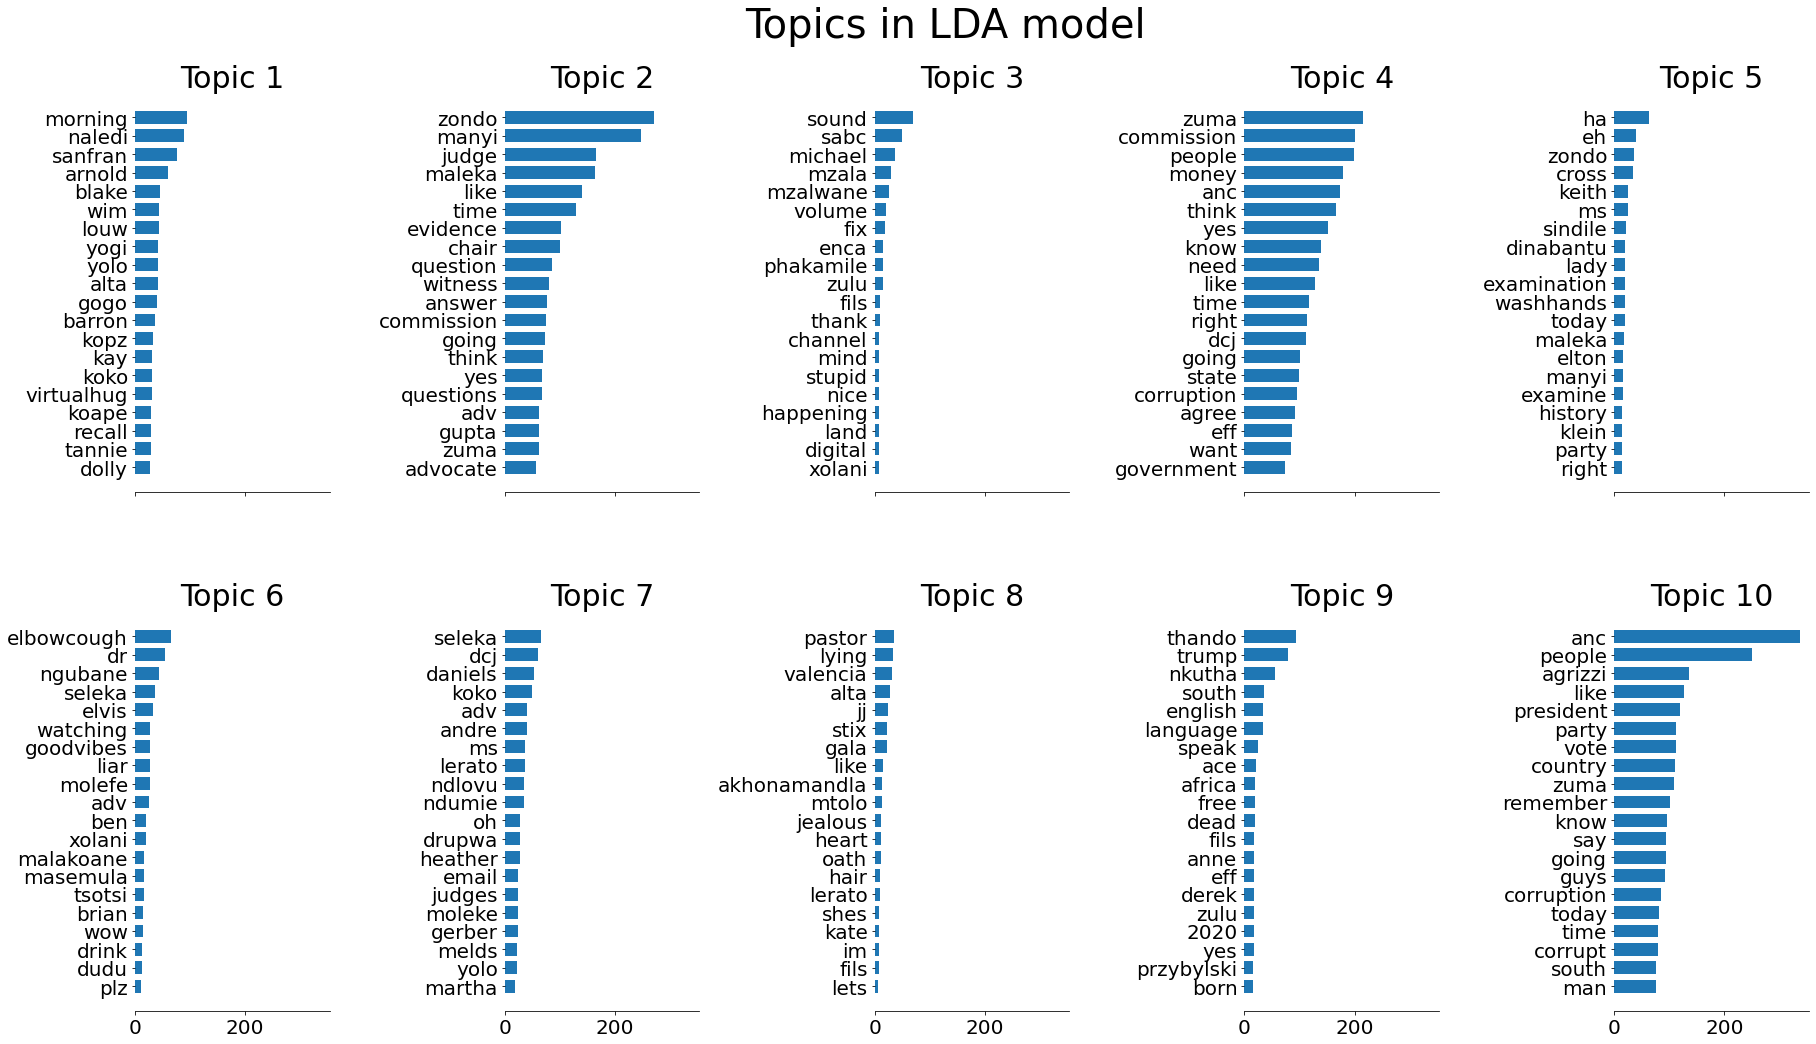

In [14]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the dataset and vectorize it.
print("Loading dataset...")
t0 = time()
data_samples = papers['message_processed1'][:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')